In [1]:
import pandas as pd

df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/'
    'machine-learning-databases/'
    'breast-cancer-wisconsin/wdbc.data',
    header=None
)


In [2]:
from sklearn.preprocessing import LabelEncoder

# Features and target
X = df.loc[:, 2:].values
y = df.loc[:, 1].values

# Encode labels
le = LabelEncoder()
y = le.fit_transform(y)

# Check classes
print(le.classes_)


['B' 'M']


In [3]:
 le.transform(['M', 'B'])

array([1, 0])

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    stratify=y,
    random_state=1
)


## Combining transformers and estimators in a pipeline

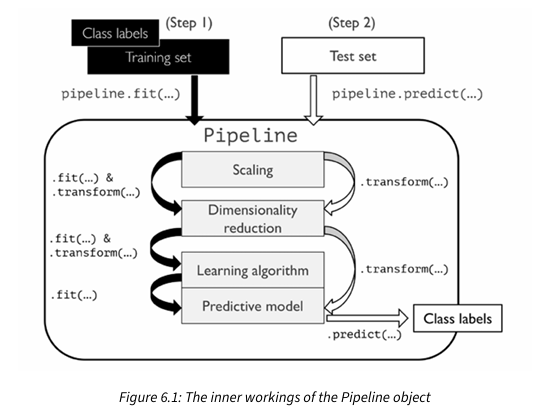

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression())

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
test_acc = pipe_lr.score(X_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')


Test accuracy: 0.956


## The holdout method
Using the holdout method, we split our initial dataset into separate 
training and test datasets—the former is used for model training, and the latter is used to estimate its 
generalization performance. 

A disadvantage of the holdout method is that the performance estimate may be very sensitive to how 
we partition the training dataset into the training and validation subsets; the estimate will vary for 
different examples of the data.

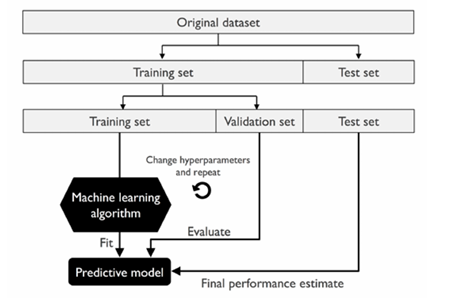

# K-fold cross-validation

## What it is
- Split data into **k folds** (no overlap).  
- Train on **k–1 folds**, test on the remaining 1.  
- Repeat **k times** → every fold used once as test.  
- Final score = **average of all folds**.  

## Why Better than Holdout
- Holdout = one split → unstable.  
- K-fold = all points used for training + testing → more reliable.  

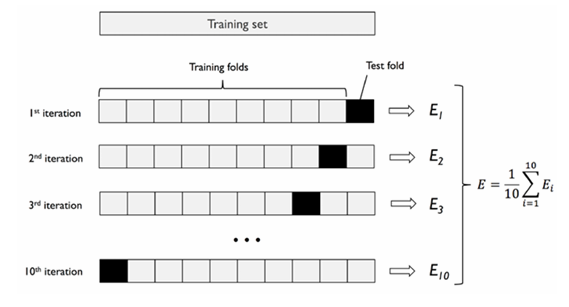

In [6]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

# Create stratified k-fold object
kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)

    print(
        f'Fold: {k+1:02d}, '
        f'Class distr.: {np.bincount(y_train[train])}, '
        f'Acc.: {score:.3f}'
    )


Fold: 01, Class distr.: [256 153], Acc.: 0.935
Fold: 02, Class distr.: [256 153], Acc.: 0.935
Fold: 03, Class distr.: [256 153], Acc.: 0.957
Fold: 04, Class distr.: [256 153], Acc.: 0.957
Fold: 05, Class distr.: [256 153], Acc.: 0.935
Fold: 06, Class distr.: [257 153], Acc.: 0.956
Fold: 07, Class distr.: [257 153], Acc.: 0.978
Fold: 08, Class distr.: [257 153], Acc.: 0.933
Fold: 09, Class distr.: [257 153], Acc.: 0.956
Fold: 10, Class distr.: [257 153], Acc.: 0.956
